## Some figures of Supporting Information: S3 to S6 + S12

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sc
import matplotlib.pyplot as plt
from matplotlib import rc
import sys
sys.path.append('./Heat_Index/')
import Heat_Index as original

In [2]:
all_stations=["Cayenne-Matoury","Maripasoula","Saint-Georges","Saint-Laurent","Raizet",
              "Saint-Barthelemy","Lamentin","Gillot","Pamandzi","Tromelin",
             "Koumac","Tontouta","Noumea","Ouanaham","Hihifo","Maopoopo",
              "Faaa","Hiva-oa","Mangareva","Rapa","Takaroa"
             ]

rc('text', usetex=True)

In [3]:
figure_path="/figures/"

### Diurnal cycles -- Fig. S5

<>:81: SyntaxWarning: invalid escape sequence '\%'
<>:81: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_65408/269075263.py:81: SyntaxWarning: invalid escape sequence '\%'
  ax2.set_ylabel('Hurs [$\%$]',fontsize=18)


Text(0.5, 0.01, 'Hour')

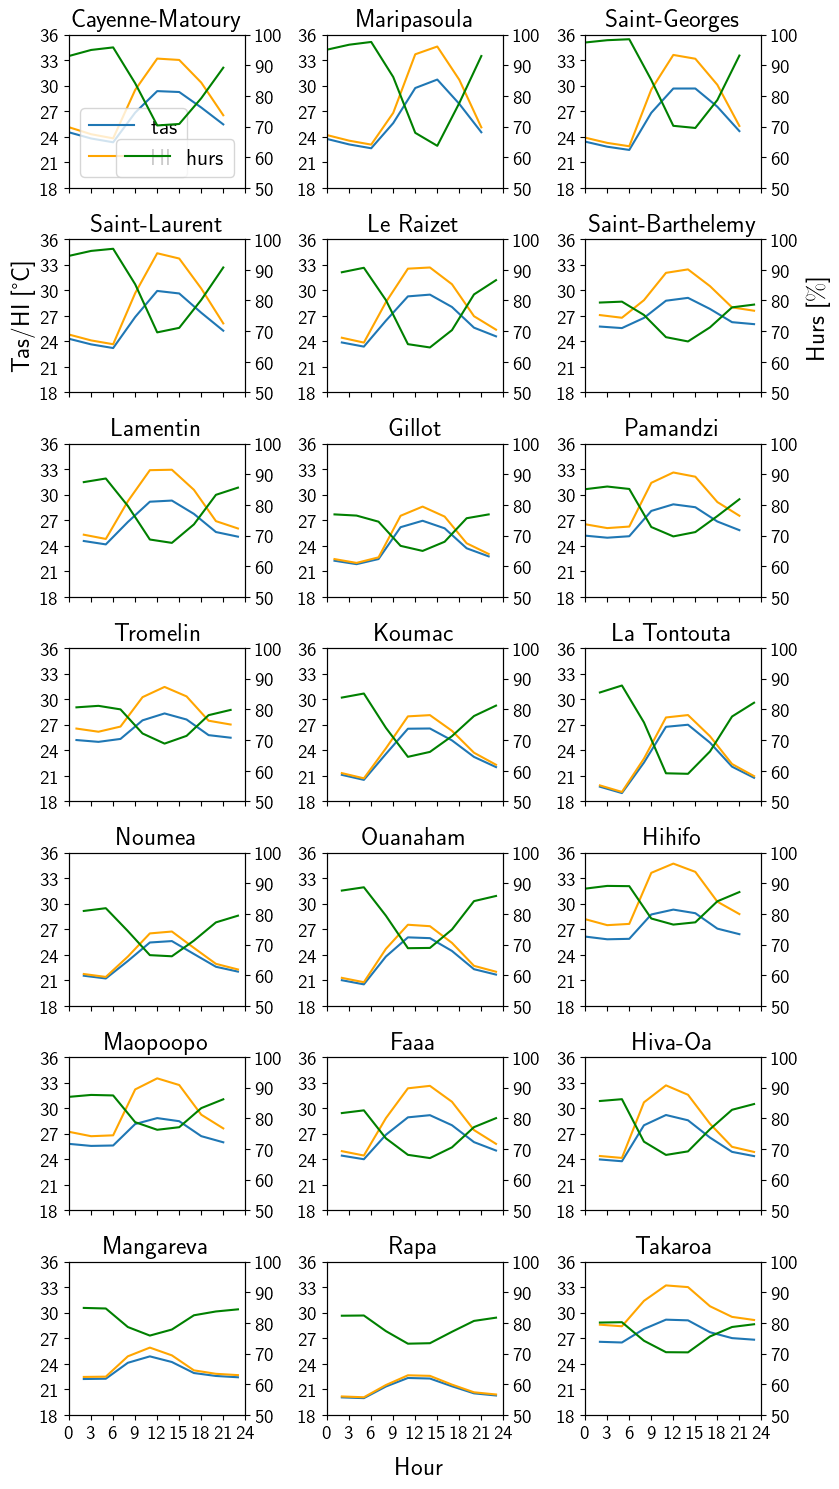

In [6]:
fig , ax = plt.subplots(nrows=7,ncols=3,
                        sharex=True,
                        #sharey=True,
                        layout='tight',figsize=(8.5,15)) 
ind_station=0


for irow in range(7):
    
    jmax=3
        
    for jcol in range(jmax):
        
        station=all_stations[ind_station]
        
        # observations
        obs_file="/OBS/obs_trihoraire_"+station+"_1985-2014.csv"

        data=pd.read_csv(obs_file)
        data['time']=pd.to_datetime(data.time)
        data=data.loc[data.time>="1990-01-01"] #to get only values for 1990-2014 for all stations
        
        
        # Heat Index computation
        data['HI']=original.Heat_Index(data['tas'].values,data['hurs'].values)
        data=data.dropna()
        tas=data['tas'].groupby(data.time.dt.hour).mean()
        hurs=data['hurs'].groupby(data.time.dt.hour).mean()
        HI=data['HI'].groupby(data.time.dt.hour).mean()
        
        
        # plot
        
        ax[irow][jcol].xaxis.set_major_formatter(FormatStrFormatter('%02d'))
        
        ax[irow][jcol].plot(tas.index.values, tas.values, label='tas')
        ax[irow][jcol].plot(HI.index.values, HI.values, color='orange',label='HI')
        
        ax[irow][jcol].set_xlim([0,24])
        ax[irow][jcol].set_xticks(np.arange(0,27,3))
        ax[irow][jcol].set_xticklabels(np.arange(0,27,3),fontsize=14)
        ax[irow][jcol].set_ylim([18,36])
        ax[irow][jcol].set_yticks(np.arange(18,39,3))
        ax[irow][jcol].set_yticklabels(np.arange(18,39,3),fontsize=14)
        

        if ((irow==1) & (jcol==0)):
            ax[irow][jcol].set_ylabel('Tas/HI [°C]',fontsize=18)
            
        if ((irow==0) & (jcol==0)):
            ax[irow][jcol].legend(loc='lower left',fontsize=16)
        
        ax2 = ax[irow][jcol].twinx()
        ax2.plot(hurs.index.values, hurs.values, color='g',label='hurs')
        ax2.set_ylim([50,100])
        ax2.set_yticks(np.arange(50,110,10))
        ax2.set_yticklabels(np.arange(50,110,10),fontsize=14)
        
        if ((irow==1) & (jcol==2)):
            ax2.set_ylabel('Hurs [$\%$]',fontsize=18)
            
        if ((irow==0) & (jcol==0)):
            ax2.legend(loc='lower right',fontsize=16)

        
        ind_station+=1


        
fig.supxlabel('Hour', fontsize=18)
        
# saving

fig.savefig(figure_path+'diurnal_3-hour_cycle_tas_hurs_HI_months.png',bbox_inches='tight',dpi=300)
fig.savefig(figure_path+'diurnal_3-hour_cycle_tas_hurs_HI_months.svg',bbox_inches='tight',dpi=300)

### Boxplots of HI distributions -- Fig. S6

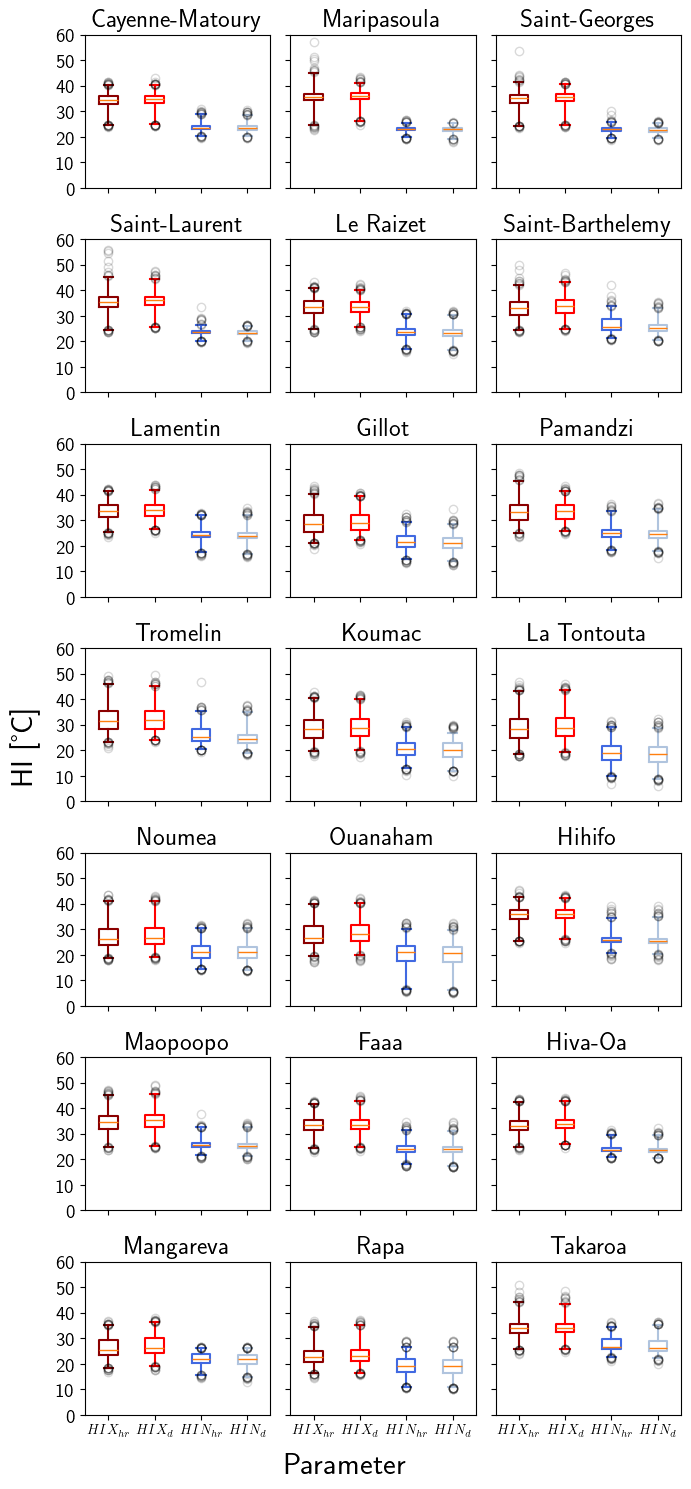

In [11]:
fig , ax = plt.subplots(nrows=7,ncols=3,
                        sharex=True,
                        sharey=True,
                        layout='tight',figsize=(7,15)) 
ind_station=0


for irow in range(7):
    
    jmax=3
        
    for jcol in range(jmax):
        
        station=all_stations[ind_station]
        
      
        obs_file="/OBS/obs_trihoraire_"+station+"_1985-2014.csv" #3-hour
        daily_file="/OBS/obs_daily_"+station+"_1985-2014.csv" # daily


        
        #HImin and HImax deduced from 3-hr data
        
        data=pd.read_csv(obs_file)
        data['time']=pd.to_datetime(data.time)
        data=data.loc[data.time>="1990-01-01"] #to get only values for 1990-2014 for all stations
        
        
        data['HI']=original.Heat_Index(data['tas'].values,data['hurs'].values)
        
        data.set_index("time",inplace=True)
        
        HImin=(data['HI'].resample('1D').min().dropna()).values#function resample creates "NaN" if there's a day with no data
        HImax=(data['HI'].resample('1D').max().dropna()).values#function resample creates "NaN" if there's a day with no data
    
    
        #HIX and HIN deduced from daily data
        
        data_daily=pd.read_csv(daily_file)
        data_daily['time']=pd.to_datetime(data_daily.time)
        data_daily=data_daily.loc[data_daily.time>="1990-01-01"] #to get only values for 1990-2014 for all stations
        
        HIX=data_daily['HIX'].dropna().values
        HIN=data_daily['HIN'].dropna().values
        
        
        #display params
        HI_lim_min=5
        HI_lim_max=45
        resol=0.1
        var_range=np.arange(HI_lim_min,HI_lim_max,resol)
        
        #plot
                
        ax[irow][jcol].boxplot(HImax, positions=[0],whis=(0.1,99.9),
                               whiskerprops={'linewidth':1.5,'color':'darkred'},boxprops={'linewidth':1.5,'color':'darkred'},
                               capprops={'linewidth':1.5,'color':'darkred'},flierprops={'alpha':0.15},widths=0.4,#tick_labels=['HIX_hr']
                              )
        ax[irow][jcol].boxplot(HIX,positions=[1],whis=(0.1,99.9),whiskerprops={'linewidth':1.5,'color':'red'},boxprops={'linewidth':1.5,'color':'red'},
                               capprops={'linewidth':1.5,'color':'red'},flierprops={'alpha':0.15},widths=0.4, #tick_labels=['HIX_d']
                              )
        ax[irow][jcol].boxplot(HImin, positions=[2],whis=(0.1,99.9),whiskerprops={'linewidth':1.5,'color':'royalblue'},boxprops={'linewidth':1.5,'color':'royalblue'},
                               capprops={'linewidth':1.5,'color':'royalblue'},flierprops={'alpha':0.15},widths=0.4,#tick_labels=['HIN_hr']
                              )
        ax[irow][jcol].boxplot(HIN,positions=[3],whis=(0.1,99.9),whiskerprops={'linewidth':1.5,'color':'lightsteelblue'},boxprops={'linewidth':1.5,'color':'lightsteelblue'},
                               capprops={'linewidth':1.5,'color':'lightsteelblue'},flierprops={'alpha':0.15},widths=0.4, #tick_labels=['HIN_d']
                              )

        ax[irow][jcol].set_ylim([0,60])
        ax[irow][jcol].set_yticks(np.arange(0,70,10))
        ax[irow][jcol].set_yticklabels([0,10,20,30,40,50,60],fontsize=14)
        
        ax[irow][jcol].set_xticks([0,1,2,3])
        ax[irow][jcol].set_xticklabels(['$HIX_{hr}$','$HIX_{d}$','$HIN_{hr}$','$HIN_{d}$'],fontsize=10)
        
        if station=="Raizet":
            ax[irow][jcol].set_title("Le Raizet",fontsize=18)
        elif station == "Tontouta":
            ax[irow][jcol].set_title("La Tontouta",fontsize=18)
        elif station == "Hiva-oa":
            ax[irow][jcol].set_title("Hiva-Oa",fontsize=18)
        else:
            ax[irow][jcol].set_title(station,fontsize=18)


        
        ind_station+=1


        
fig.supylabel('HI [°C]', fontsize=22)
fig.supxlabel('Parameter', fontsize=22)

        
#saving        
fig.savefig(figure_path+'boxplots_HIN_HIX.png',bbox_inches='tight',dpi=300)
fig.savefig(figure_path+'boxplots_HIN_HIX.svg',bbox_inches='tight',dpi=300)

### Annual standard deviation -- Fig. S12

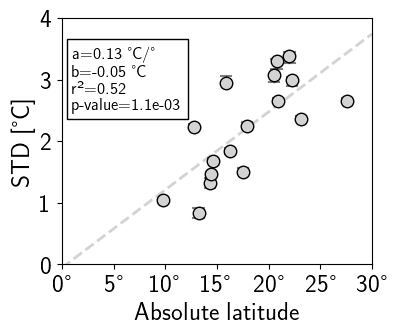

In [13]:
fig , ax = plt.subplots(nrows=1,ncols=1,
                        #sharex=True,
                        #sharey=True,
                        figsize=(4,3.2)) 


    
latitudes=[9.806,12.8055,13.2398,14.3078,14.456833,14.595333,15.8876,16.264,17.555167,17.9015,20.558667,20.777667,
           20.892167,22.017333,22.276009,23.130167,27.618333]
    
all_stations=["Hiva-oa","Pamandzi","Hihifo","Maopoopo","Takaroa","Lamentin","Tromelin",
                 "Raizet","Faaa","Saint-Barthelemy","Koumac","Ouanaham","Gillot","Tontouta","Noumea",
                 "Mangareva","Rapa"] #island stations

Modeles=["ACCESS-CM2",
         "CanESM5",
         "CNRM-ESM2-1",
        "CNRM-CM6-1",
        "CNRM-CM6-1-HR",
         "EC-Earth3","EC-Earth3-CC","EC-Earth3-Veg-LR",
         "KACE-1-0-G",
         "IPSL-CM6A-LR","MIROC6","MIROC-ES2L","MPI-ESM1-2-HR",
         "MPI-ESM1-2-LR",
         "NorESM2-MM"]

std_tab=np.empty((len(all_stations),len(Modeles)))

ind_station=0
        
for station in all_stations:
    
    station=all_stations[ind_station]
            
    std_mod=[]
    
    for modele in Modeles:
        mod_file = "/CMIP6/HIM/"+station+"_"+modele+"_BC_3M_HIM_day_1990-2014.csv"
        mod=pd.read_csv(mod_file,sep=';')
        mod['time']=pd.to_datetime(mod.time,errors='coerce')
        mod=mod.loc[mod.time>="1990-01-01"] #to get values over 1990 only

        
        HIM_monthly=mod['HI'].groupby(mod.time.dt.month).mean()
        
        
        std=np.std(HIM_monthly.values)
        
        std_mod.append(std)
        
    
    std_tab[ind_station,:]=std_mod
    
        
    # plot
    bplot=ax.boxplot(np.array(std_mod),whis=(10,90),positions=np.array([latitudes[ind_station]]), patch_artist=True,showfliers=False,widths=0.0,capprops={'alpha':0.5,'linewidth':1.5},
                      whiskerprops={'alpha':0.5,'linewidth':1},boxprops={'alpha':0.5,'linewidth':1},capwidths=1,zorder=2)            #axs.plot(np.array([pos[i]]),np.array([intensity_obs]),color='k',marker='o', linestyle='',label='OBS (1990-2014)') 
            
    ax.plot(np.array([latitudes[ind_station]]),np.nanmedian(std_mod),color="lightgrey",marker='o',markersize=9,mec='k',linestyle='',
                                 #label='medians',
                                 zorder=2)
    
    ind_station+=1

# linear fit
a, b, r, p_value, std_err=sc.linregress(np.array(latitudes),np.nanmedian(std_tab,axis=1))

ax.plot(np.arange(-10,35,0.01),a*np.arange(-10,35,0.01)+b,color="lightgrey",linewidth=2,linestyle='--',label='lin. reg.',zorder=1)

ax.text(1,2.5,'a={:.2f} °C/°\nb={:.2f} °C\nr²={:.2f}\np-value={:.1e}'.format(np.round(a,2),np.round(b,2),np.round(r**2,2),p_value),bbox=dict(facecolor='white'),fontsize=12)
        

ax.set_ylim([0,4])
ax.set_yticks([0,1,2,3,4])
ax.set_yticklabels([0,1,2,3,4],fontsize=18) 
ax.set_ylabel('STD [°C]',fontsize=18)

ax.set_xlim([0,30])
ax.set_xticks([0,5,10,15,20,25,30])
ax.set_xticklabels(["0°","5°","10°","15°","20°","25°","30°"],fontsize=18)        
ax.set_xlabel('Absolute latitude',fontsize=18)

        
# saving
        
fig.savefig(figure_path+'seasonnal_std_cmip6.png',bbox_inches='tight',dpi=300)
fig.savefig(figure_path+'seasonnal_std_cmip6.svg',bbox_inches='tight',dpi=300)

### quantile-quantile diagrams of tas -- Fig. S3

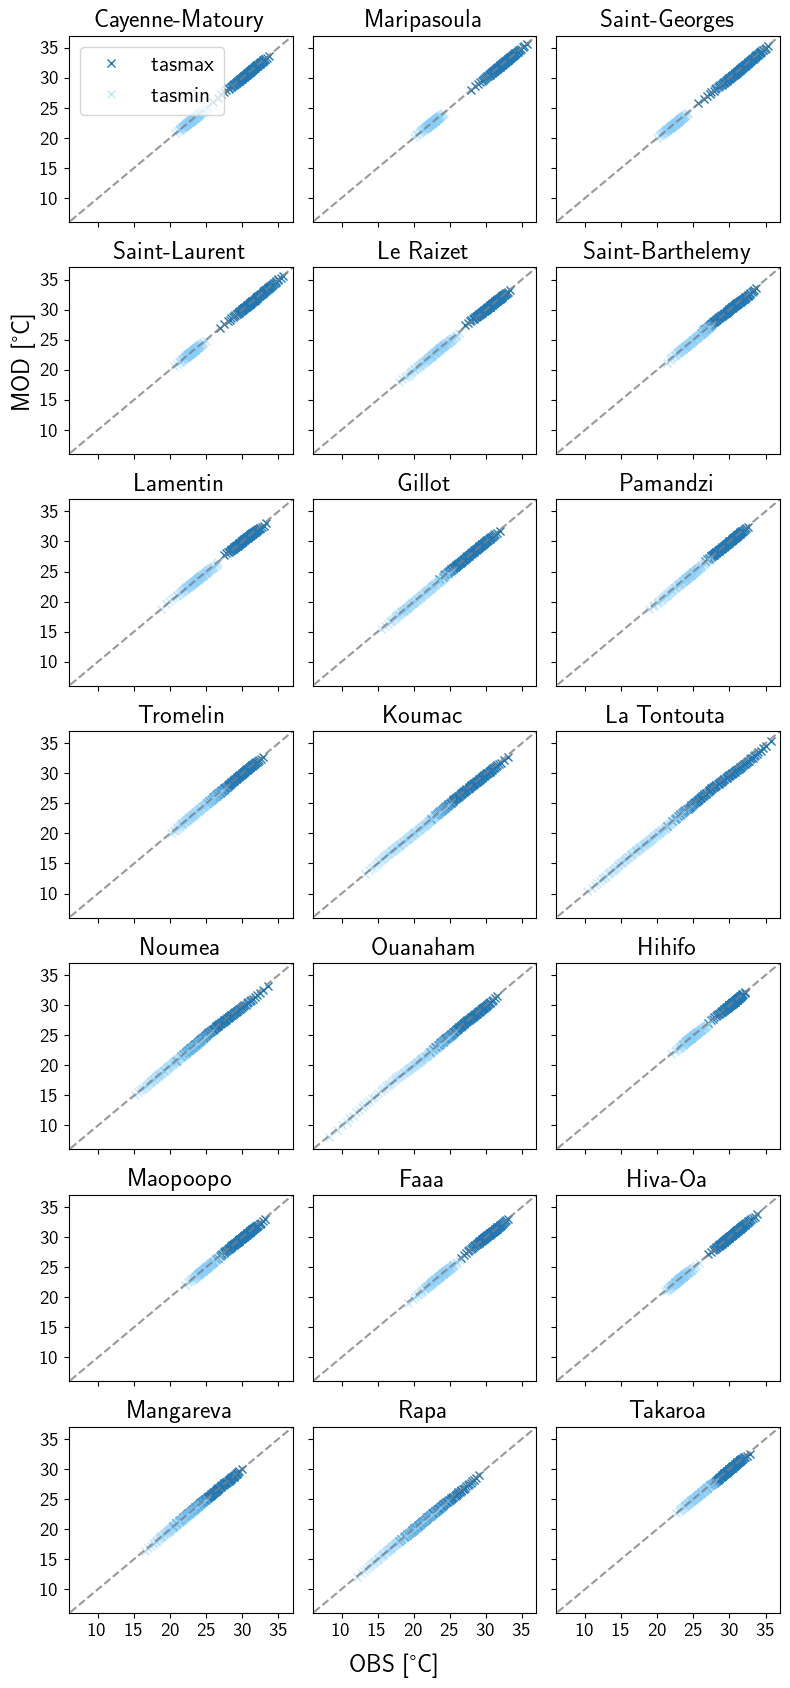

In [41]:
fig , ax = plt.subplots(nrows=7,ncols=3,
                        sharex=True,
                        sharey=True,
                        layout='tight',figsize=(8,17)) 



all_stations=["Cayenne-Matoury","Maripasoula","Saint-Georges","Saint-Laurent","Raizet",
              "Saint-Barthelemy","Lamentin","Gillot","Pamandzi","Tromelin",
             "Koumac","Tontouta","Noumea","Ouanaham","Hihifo","Maopoopo",
              "Faaa","Hiva-oa","Mangareva","Rapa","Takaroa"
             ]

Modeles=["ACCESS-CM2",
         "CanESM5",
         "CNRM-ESM2-1",
        "CNRM-CM6-1",
        "CNRM-CM6-1-HR",
         "EC-Earth3","EC-Earth3-CC","EC-Earth3-Veg-LR",
         "KACE-1-0-G",
         "IPSL-CM6A-LR","MIROC6","MIROC-ES2L","MPI-ESM1-2-HR",
         "MPI-ESM1-2-LR",
         "NorESM2-MM"]

ind_station=0

for irow in range(7):

    jmax=3
        
    for jcol in range(jmax):
        
        station=all_stations[ind_station]
        
        # Observations
        daily_file="/OBS/obs_daily_"+station+"_1985-2014.csv"

        data_daily=pd.read_csv(daily_file)
        data_daily['time']=pd.to_datetime(data_daily.time)
        data_daily=data_daily.loc[data_daily.time>="1990-01-01"] #to get only values for 1990-2014 for all stations
        
        TX=data_daily['tasmax'].dropna()
        TN=data_daily['tasmin'].dropna()
        
        
        
        
        #CMIP6 data aggregation
        
        tx=pd.DataFrame()
        tn=pd.DataFrame()
        
        for modele in Modeles:
    
            mod_tx_file = "/CMIP6/tasmax/"+station+"_"+modele+"_BC_3M_tasmax_day_1985-2014.csv"
            mod_tx=pd.read_csv(mod_tx_file,sep=';')
            mod_tx['time']=pd.to_datetime(mod_tx.time,errors='coerce')
            mod_tx=mod_tx.loc[mod_tx.time>="1990-01-01"]
            
            tx=pd.concat([tx,mod_tx])
            
            mod_tn_file = "/CMIP6/tasmin/"+station+"_"+modele+"_BC_3M_tasmin_day_1985-2014.csv"
            mod_tn=pd.read_csv(mod_tn_file,sep=';')
            mod_tn['time']=pd.to_datetime(mod_tn.time,errors='coerce')
            mod_tn=mod_tn.loc[mod_tn.time>="1990-01-01"]
            
            tn=pd.concat([tn,mod_tn])
            
        
        #plot
        
        tx_q=tx.quantile(np.arange(0.01,1,0.01))
        tn_q=tn.quantile(np.arange(0.01,1,0.01))
        
        TX_q=TX.quantile(np.arange(0.01,1,0.01))
        TN_q=TN.quantile(np.arange(0.01,1,0.01))

                
        ax[irow][jcol].plot(TX_q.values,tx_q.tasmax_corr.values,color='tab:blue',ls='',marker='x',label='tasmax')
        ax[irow][jcol].plot(TN_q.values,tn_q.tasmin_corr.values,color='lightskyblue',ls='',alpha=0.5,marker='x',label='tasmin')
        ax[irow][jcol].plot(np.arange(5,45,5),np.arange(5,45,5),color='grey',ls='--',alpha=0.8)

        ax[irow][jcol].set_xticks(np.arange(5,40,5))
        ax[irow][jcol].set_xticklabels(np.arange(5,40,5),fontsize=14)
        ax[irow][jcol].set_xlim([6,37])

        ax[irow][jcol].set_yticks(np.arange(5,40,5))
        ax[irow][jcol].set_yticklabels(np.arange(5,40,5),fontsize=14)
        ax[irow][jcol].set_ylim([6,37])
        
        
        if ((irow==1) & (jcol==0)):
            ax[irow][jcol].set_ylabel('MOD [°C]',fontsize=18)
            #ax[irow][jcol].legend(loc=(-0.7,1))
            
        if ((irow==0) & (jcol==0)):
            ax[irow][jcol].legend(loc='upper left',fontsize=16)

        
        ind_station+=1


        
fig.supxlabel('OBS [°C]', fontsize=18)
        
#saving

fig.savefig(figure_path+'diag_QQ_tasmax_tasmin.png',bbox_inches='tight',dpi=300)
fig.savefig(figure_path+'diag_QQ_tasmax_tasmin.svg',bbox_inches='tight',dpi=300)

### quantile-quantile diagrams of hurs -- Fig. S4

<>:139: SyntaxWarning: invalid escape sequence '\%'
<>:150: SyntaxWarning: invalid escape sequence '\%'
<>:139: SyntaxWarning: invalid escape sequence '\%'
<>:150: SyntaxWarning: invalid escape sequence '\%'
/tmp/ipykernel_17798/3083039910.py:139: SyntaxWarning: invalid escape sequence '\%'
  ax[irow][jcol].set_ylabel('MOD [$\%$]',fontsize=18)
/tmp/ipykernel_17798/3083039910.py:150: SyntaxWarning: invalid escape sequence '\%'
  fig.supxlabel('OBS [$\%$]', fontsize=18)


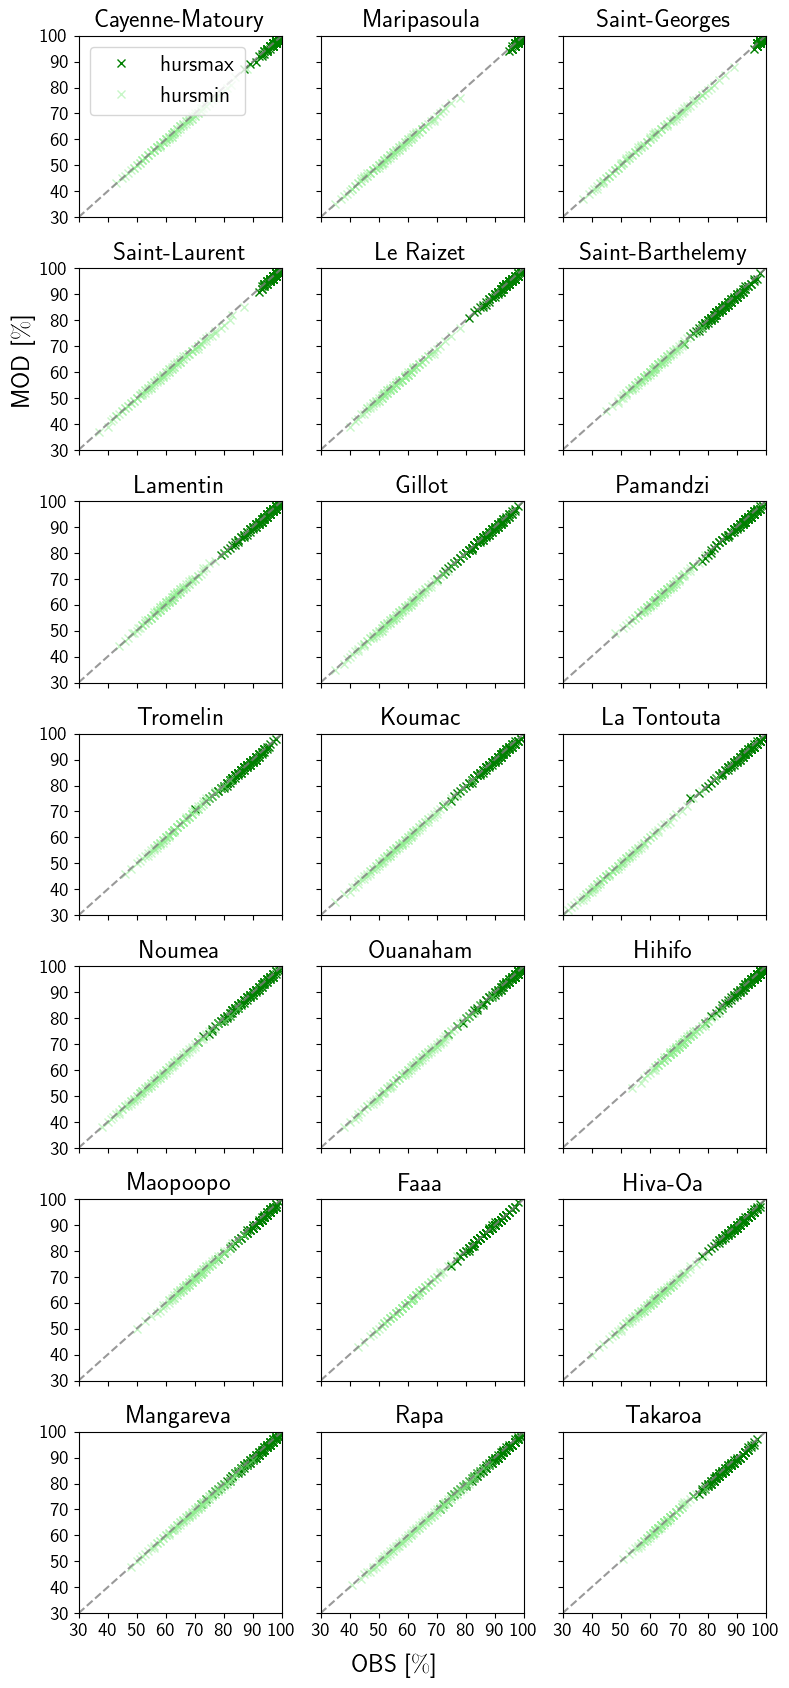

In [43]:
fig , ax = plt.subplots(nrows=7,ncols=3,
                        sharex=True,
                        sharey=True,
                        layout='tight',figsize=(8,17)) 



all_stations=["Cayenne-Matoury","Maripasoula","Saint-Georges","Saint-Laurent","Raizet",
              "Saint-Barthelemy","Lamentin","Gillot","Pamandzi","Tromelin",
             "Koumac","Tontouta","Noumea","Ouanaham","Hihifo","Maopoopo",
              "Faaa","Hiva-oa","Mangareva","Rapa","Takaroa"
             ]


Modeles=["ACCESS-CM2",
         "CanESM5",
         "CNRM-ESM2-1",
        "CNRM-CM6-1",
        "CNRM-CM6-1-HR",
         "EC-Earth3","EC-Earth3-CC","EC-Earth3-Veg-LR",
         "KACE-1-0-G",
         "IPSL-CM6A-LR","MIROC6","MIROC-ES2L","MPI-ESM1-2-HR",
         "MPI-ESM1-2-LR",
         "NorESM2-MM"]

ind_station=0

for irow in range(7):

    jmax=3
        
    for jcol in range(jmax):
        
        station=all_stations[ind_station]
        
        daily_file="/OBS/obs_daily_"+station+"_1985-2014.csv"


        # Observation data
        data_daily=pd.read_csv(daily_file)
        data_daily['time']=pd.to_datetime(data_daily.time)
        data_daily=data_daily.loc[data_daily.time>="1990-01-01"] #to get only values for 1990-2014 for all stations
        
        HX=data_daily['hursmax'].dropna()
        HN=data_daily['hursmin'].dropna()
        
        
        
        
        # CMIP6 data aggregation
        
        hx=pd.DataFrame()
        hn=pd.DataFrame()
        
        for modele in Modeles:
          
          
            mod_hx_file = "/CMIP6/hursmax/"+station+"_"+modele+"_BC_3M_hursmax_day_1985-2014.csv"
            mod_hx=pd.read_csv(mod_hx_file,sep=';')
            mod_hx['time']=pd.to_datetime(mod_hx.time,errors='coerce')
            mod_hx=mod_hx.loc[mod_hx.time>="1990-01-01"]
            
            hx=pd.concat([hx,mod_hx])
            
            mod_hn_file = "/CMIP6/hursmin/"+station+"_"+modele+"_BC_3M_hursmin_day_1985-2014.csv"
            mod_hn=pd.read_csv(mod_hn_file,sep=';')
            mod_hn['time']=pd.to_datetime(mod_hn.time,errors='coerce')
            mod_hn=mod_hn.loc[mod_hn.time>="1990-01-01"]
            
            hn=pd.concat([hn,mod_hn])
          
            
        #plot
        
        hx_q=hx.quantile(np.arange(0.01,1,0.01))
        hn_q=hn.quantile(np.arange(0.01,1,0.01))
        
        HX_q=HX.quantile(np.arange(0.01,1,0.01))
        HN_q=HN.quantile(np.arange(0.01,1,0.01))

                
        ax[irow][jcol].plot(HX_q.values,hx_q.hursmax_corr.values,color='green',ls='',marker='x',label='hursmax')
        ax[irow][jcol].plot(HN_q.values,hn_q.hursmin_corr.values,color='lightgreen',ls='',alpha=0.5,marker='x',label='hursmin')
        ax[irow][jcol].plot(np.arange(30,105,5),np.arange(30,105,5),color='grey',ls='--',alpha=0.8)

        ax[irow][jcol].set_xticks(np.arange(30,110,10))
        ax[irow][jcol].set_xticklabels(np.arange(30,110,10),fontsize=14)
        ax[irow][jcol].set_xlim([30,100])

        ax[irow][jcol].set_yticks(np.arange(30,110,10))
        ax[irow][jcol].set_yticklabels(np.arange(30,110,10),fontsize=14)
        ax[irow][jcol].set_ylim([30,100])


        
        if ((irow==1) & (jcol==0)):
            ax[irow][jcol].set_ylabel('MOD [$\%$]',fontsize=18)
            
        if ((irow==0) & (jcol==0)):
            ax[irow][jcol].legend(loc='upper left',fontsize=16)

        
        ind_station+=1


        
fig.supxlabel('OBS [$\%$]', fontsize=18)
        
#saving        
fig.savefig(figure_path+'diag_QQ_hursmax_hursmin.png',bbox_inches='tight',dpi=300)
fig.savefig(figure_path+'diag_QQ_hursmax_hursmin.svg',bbox_inches='tight',dpi=300)